# OpenBabel Interface

In this tutorial we will demonstrate how `molli` `Molecule` objects can be efficiently converted into `openbabel` objects.

Note: `openbabel` is not natively installed within Molli, but it can be added through conda using the line:
`conda install openbabel`

In [1]:
#Imports molli
import molli as ml

#Imports the Openbabel
from openbabel import openbabel as ob

#Imports molli interface with openbabel for additional functionality
from molli.external import openbabel as mob
ml.visual.configure(bgcolor='white')

The following cell shows a conversion of an example molecule into openbabel `OBMol` object

In [2]:
#This loads the Molli molecule object
ml_mol = ml.load(ml.files.dendrobine_mol2)

#This creates an instance of an OBMol object
obmol = mob.to_obmol(ml_mol)

Now let's make sure that what we get out of that operation is a valid `OBMol` object by converting it into a human readable representation.

In [ ]:
converter = ob.OBConversion()
converter.SetInAndOutFormats("mol2", "mol2")
print(converter.WriteString(obmol))

@<TRIPOS>MOLECULE
dendrobine
 44 47 0 0 0
SMALL
GASTEIGER

@<TRIPOS>ATOM
      1 N           1.2960   -0.2319    1.2670 N.3     1  UNL1       -0.2981
      2 C           0.0573   -0.0226    2.1227 C.3     1  UNL1        0.0024
      3 C          -1.0974   -0.4738    1.2059 C.3     1  UNL1       -0.0210
      4 C          -0.4284   -0.4113   -0.1687 C.3     1  UNL1       -0.0055
      5 C           0.8683    0.3598   -0.0004 C.3     1  UNL1        0.0534
      6 C           2.4562    0.4417    1.8361 C.3     1  UNL1       -0.0123
      7 C          -2.4328    0.2659    0.9832 C.3     1  UNL1       -0.0482
      8 C          -2.6553    0.2472   -0.5801 C.3     1  UNL1       -0.0486
      9 C          -1.2428    0.5626   -1.0163 C.3     1  UNL1       -0.0205
     10 C           1.5353    0.5790   -1.4179 C.3     1  UNL1        0.1228
     11 O           1.3410    2.0363   -1.6507 O.3     1  UNL1       -0.4592
     12 C           0.0782    2.2291   -2.2166 C.2     1  UNL1        0.3112
   

Molli has built in wrappers that can interface within Openbabel. For example, an `ml_mol` object could be converted to a file format that is not natively available as an output within Molli, such as SDF or SMILES, using the `ml.dumps` function.

In [4]:
sdf_str = ml.dumps(ml_mol, fmt='sdf', writer='openbabel')

print(sdf_str)

smi_str = ml.dumps(ml_mol, fmt='smi', writer='openbabel')

print(smi_str)

dendrobine
 OpenBabel10212414373D

 44 47  0  0  1  0  0  0  0  0999 V2000
    1.2960   -0.2319    1.2670 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.0573   -0.0226    2.1227 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0974   -0.4738    1.2059 C   0  0  2  0  0  0  0  0  0  0  0  0
   -0.4284   -0.4113   -0.1687 C   0  0  2  0  0  0  0  0  0  0  0  0
    0.8683    0.3598   -0.0004 C   0  0  2  0  0  0  0  0  0  0  0  0
    2.4562    0.4417    1.8361 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4328    0.2659    0.9832 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.6553    0.2472   -0.5801 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2428    0.5626   -1.0163 C   0  0  2  0  0  0  0  0  0  0  0  0
    1.5353    0.5790   -1.4179 C   0  0  2  0  0  0  0  0  0  0  0  0
    1.3410    2.0363   -1.6507 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.0782    2.2291   -2.2166 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5977    0.8539   -2.4020 C   0  0  1  0  0  0  0  0  0  0  0  0
   -0.4135    3

## CDXMLFile to Optimized Structure Example

The `molli` package does not have native geometry optimization; however, the interface with `openbabel` allows for the use of molecular forcefields to return updated coordinates for the `ml_mol`. This will be shown with an axial chiral structure R-BINOL.

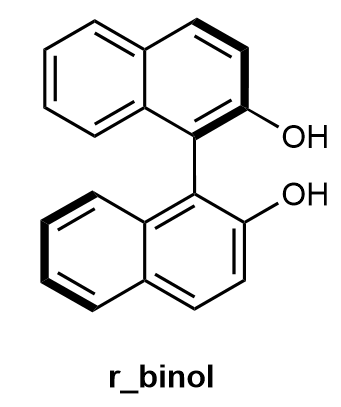

In [5]:
# Reads CDXML File
cdxf = ml.CDXMLFile(ml.files.parser_demo_cdxml)

# Access molecule object
ml_mol = cdxf['r_binol']

# Adds implicit hydrogens
ml_mol.add_implicit_hydrogens()
ml_mol

/home/blakeo2/new_molli/molli_dev/molli/molli/ftypes/cdxml.py:157: CDXMLSyntaxWarning: CDXML file /home/blakeo2/new_molli/molli_dev/molli/molli/files/parser_demo.cdxml contains redundant label 'naphthalene' Only the first occurrence will be kept.
  warn(


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Molecule(name='r_binol', formula='C20 H14 O2')

In [6]:
#Optimizes the structure
mob.obabel_optimize(
    ml_mol,
    ff = "MMFF94",
    max_steps = 1000,
    inplace=True,
    coord_displace=True #Sometimes necessary to get flat bonds/structures to correctly relax
)
ml_mol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Molecule(name='r_binol', formula='C20 H14 O2')

## Multi-Attachment Optimization from CDXML File

`molli` has also introduced a prototype optimization function `optimize_coordination`, that has been successfully tested with a few different structures. It has run into some issues with Linux and Mac operating systems, but has shown greater success on Windows. It is available in the `openbabel` interface within `molli`, but due to the problems on varying OS, it is not fully illustrated in this example.
